In [1]:
#LINEAR REGRESSION HOMEWORK


#Loading all libaries that are needed for analysis

%matplotlib inline

#libraries for exploration and analysis purposes
import numpy as np
import pandas as pd
import scipy
import math


import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import durbin_watson
from sklearn import metrics



#libraries for fitting the model
import sklearn as skl
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('C:/Users/FRANKO DE MONACCO/Desktop/USBKEY/Stata/MyData/RawData/ACME-HappinessSurvey2020.csv')

In [3]:
len(df)

126

In [4]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [5]:
Y = df['Y']

In [6]:
X = df.drop(['Y','X5','X3'], axis=1)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=5)

In [8]:
print(X_train.shape)

(88, 4)


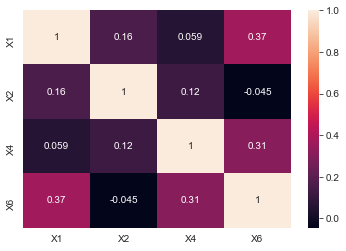

In [9]:
Xcorr = X_train.corr()
corrMtarix = sns.heatmap(Xcorr, annot=True)

In [10]:
np.log(X_train['X1'])

56     1.609438
49     1.609438
12     1.609438
32     1.098612
54     1.386294
         ...   
102    1.609438
61     1.609438
111    1.609438
78     1.609438
99     1.098612
Name: X1, Length: 88, dtype: float64

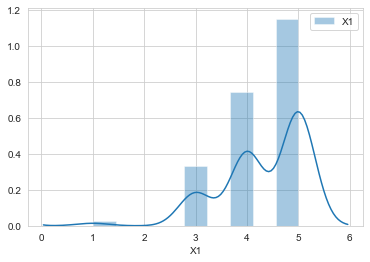

In [11]:
sns.distplot(a=X_train['X1'],label='X1')
#sns.distplot(a=X_train['X5'], label='X5')

plt.legend()

In [12]:
df1 = pd.DataFrame(X_train)
df1.head()

,X1,X2,X4,X6
56,5,1,5,5
49,5,1,3,4
12,5,2,5,5
32,3,2,4,5
54,4,3,4,4


In [13]:
df2 = pd.DataFrame(Y_train)
df2.head()
dfmerge = pd.merge(df2, df1, on= df1.index)
dfmerge = dfmerge.set_index('key_0')
dfmerge.head()

,Y,X1,X2,X4,X6
key_0,,,,,
56,0,5,1,5,5
49,1,5,1,3,4
12,1,5,2,5,5
32,1,3,2,4,5
54,1,4,3,4,4


In [14]:
reg = smf.logit('Y_train ~ X1', data=dfmerge)
res = reg.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.678625
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Y_train   No. Observations:                   88
Model:                          Logit   Df Residuals:                       86
Method:                           MLE   Df Model:                            1
Date:                Wed, 28 Apr 2021   Pseudo R-squ.:                 0.01765
Time:                        15:50:35   Log-Likelihood:                -59.719
converged:                       True   LL-Null:                       -60.792
Covariance Type:            nonrobust   LLR p-value:                    0.1429
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5729      1.213     -1.296      0.195      -3.951       0.805
X1             0.3950      0.276      1.434      0.152      -0.145       0.935
==============================================================================
"""

In [15]:
model = LogisticRegression()

In [16]:
X_train = X_train.drop(['X2','X4'], axis=1)
X_train.head()

,X1,X6
56,5,5
49,5,4
12,5,5
32,3,5
54,4,4


In [17]:
results= model.fit(X_train, Y_train)

In [18]:
X_test = X_test.drop(['X2','X4'],axis=1)
X_test.head()

,X1,X6
60,4,5
48,5,3
28,3,4
63,5,5
92,5,4


In [19]:
predictY = model.predict(X_test)
model.score(X_test, Y_test)

0.7631578947368421